In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
import glob
import sys
from subprocess import call
sys.path.append('../')
from package_global_functions import *
from evo_to_stationary import intEvo

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

def getQPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    else:
        path = '/res_files'
    return path

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1.0
1.2857404154772192 0.005592840057440651


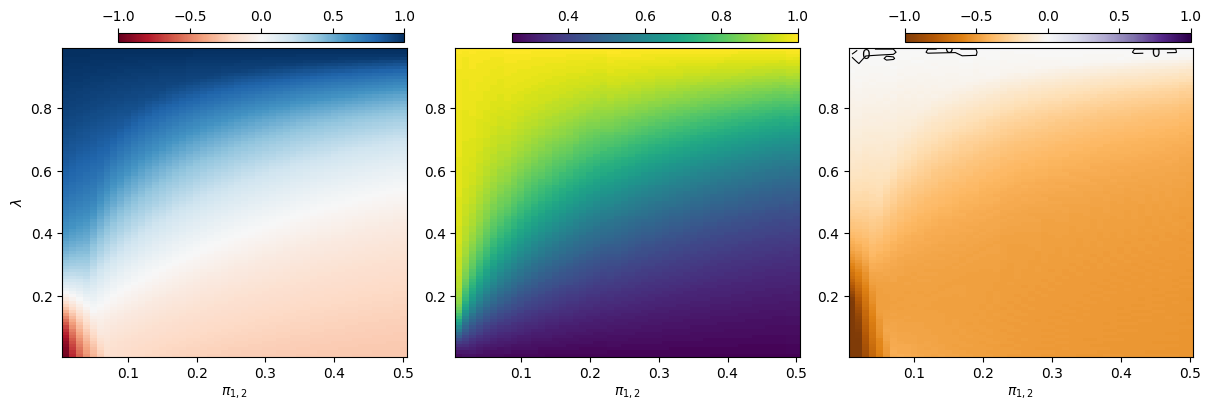

In [52]:
q1, q2, x = 7, 10, 2
fsMesh = np.load(f'{getQPath()}/map_sym_q1_{q1}_q2_{q2}.npz')
tmesh = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_sym_q1_{q1}_q2_{q2}.npz')
tmesh['time'][0,-1] = tmesh['time'][0,-2]
norm = 'abs'
norm = 'l'

f0x1 = np.maximum(fsMesh['fs'][0], x*fsMesh['fs'][1])
QmodMesh = fsMesh['fs'][2] - f0x1
QmodMesh = QmodMesh[:,:-1]

# Normalization by the maximum in all the pi12-lambda state space
if norm == 'abs':
    QmodMeshNorm = QmodMesh/np.max(QmodMesh)
    tNormMesh = tmesh['time']/np.max(tmesh['time'])
# Normalization by the maximum varying lambda for each pi21
elif norm == 'l':
    QmodMeshNorm = QmodMesh
    for i in range(len(QmodMesh[:,0])):
        maxQvarl = np.max(QmodMesh[i,:])
        QmodMeshNorm[i,:] = QmodMeshNorm[i,:]/maxQvarl
    tNormMesh = tmesh['time']
    for i in range(len(tNormMesh[:,0])):
        maxTimevarl = np.max(tNormMesh[i,:])
        tNormMesh[i,:] = tNormMesh[i,:]/maxTimevarl

CFmesh = QmodMeshNorm - tNormMesh

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
ax[0].set_xlabel('$\pi_{1,2}$')
ax[1].set_xlabel('$\pi_{1,2}$')
ax[2].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

maxval = np.max(abs(QmodMeshNorm))
print(maxval)
if maxval > 1:
    maxval = 1.0
zLim = [-maxval, maxval]
im = ax[0].pcolormesh(tmesh['x'], tmesh['y'], QmodMeshNorm, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

im = ax[1].pcolormesh(tmesh['x'], tmesh['y'], tNormMesh, shading='nearest')
fig.colorbar(im, ax=ax[1], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

maxval = np.max(abs(CFmesh))
maxval_pos = np.max(CFmesh)
print(maxval, maxval_pos)
im = ax[2].pcolormesh(tmesh['x'], tmesh['y'], CFmesh, cmap='PuOr', shading='nearest', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax[2], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
con = ax[2].contour(tmesh['x'], tmesh['y'], CFmesh, levels=[0,], linewidths=0.8, cmap='gnuplot')
ax[2].clabel(con)

fig.savefig(f'fitness_func_1_sym_q1_{q1}_q2_{q2}_norm_{norm}_Q_time_cf_mplot.png')

2.022735005192874


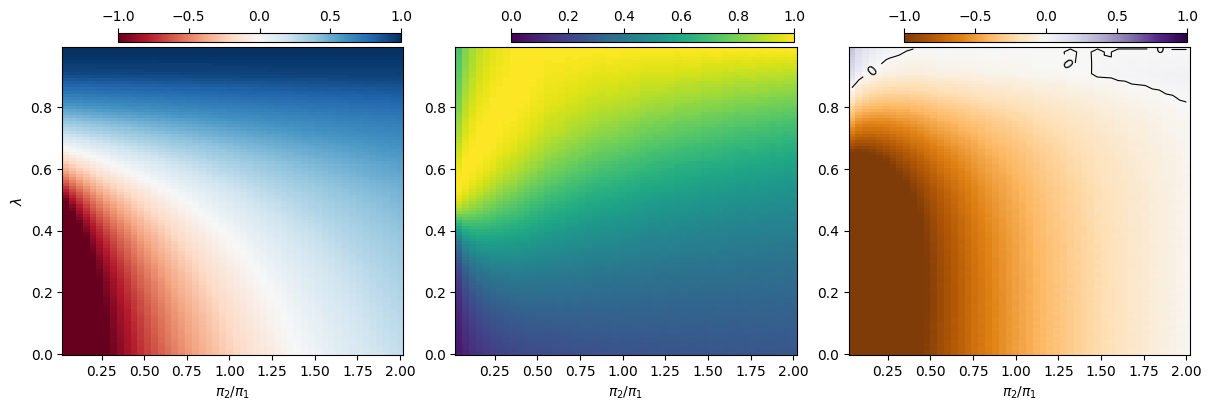

In [51]:
q1, q2, pi1, x = 7, 10, 0.25, 2
fsMesh = np.load(f'{getQPath()}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
tmesh = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
norm = 'abs'
norm = 'l'

f0x1 = np.maximum(fsMesh['fs'][0], x*fsMesh['fs'][1])
QmodMesh = fsMesh['fs'][2] - f0x1

# Normalization by the maximum in all the pi12-lambda state space
if norm == 'abs':
    QmodMeshNorm = QmodMesh/np.max(QmodMesh)
    tNormMesh = tmesh['time']/np.max(tmesh['time'])
# Normalization by the maximum varying lambda for each pi21
elif norm == 'l':
    QmodMeshNorm = QmodMesh
    for i in range(len(QmodMesh[:,0])):
        maxQvarl = np.max(QmodMesh[i,:])
        QmodMeshNorm[i,:] = QmodMeshNorm[i,:]/maxQvarl
    tNormMesh = tmesh['time']
    for i in range(len(tNormMesh[:,0])):
        maxTimevarl = np.max(tNormMesh[i,:])
        tNormMesh[i,:] = tNormMesh[i,:]/maxTimevarl

CFmesh = QmodMeshNorm - tNormMesh

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
ax[0].set_xlabel('$\pi_{2}/\pi_{1}$')
ax[1].set_xlabel('$\pi_{2}/\pi_{1}$')
ax[2].set_xlabel('$\pi_{2}/\pi_{1}$')
ax[0].set_ylabel('$\lambda$')

# maxval = np.max(abs(QmodMeshNorm))
# print(maxval)
# if maxval > 1:
#     maxval = 1.0
# zLim = [-maxval, maxval]
im = ax[0].pcolormesh(tmesh['x']/pi1, tmesh['y'], QmodMeshNorm, cmap='RdBu', shading='nearest', vmin=-1, vmax=1) # , vmin=zLim[0], vmax=zLim[1]
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

im = ax[1].pcolormesh(tmesh['x']/pi1, tmesh['y'], tNormMesh, shading='nearest', vmin=0, vmax=1)
fig.colorbar(im, ax=ax[1], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

maxval = np.max(abs(CFmesh))
print(maxval)
im = ax[2].pcolormesh(tmesh['x']/pi1, tmesh['y'], CFmesh, cmap='PuOr', shading='nearest', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax[2], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
con = ax[2].contour(tmesh['x']/pi1, tmesh['y'], CFmesh, levels=[0,], linewidths=0.8, cmap='gnuplot')
ax[2].clabel(con)

fig.savefig(f'fitness_func_1_asym_fixPi1_{pi1}_q1_{q1}_q2_{q2}_norm_{norm}_Q_time_cf_mplot.png')

In [5]:
q1, q2, x = 7, 10, 2
fsMesh = np.load(f'{getQPath()}/map_sym_q1_{q1}_q2_{q2}.npz')
tmesh = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_sym_q1_{q1}_q2_{q2}.npz')

In [9]:
fsMesh['y'][0]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [8]:
tmesh['y'][0]

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])